# Boston Housing Study - Assignment 4 

In [1]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
import seaborn as sns  # pretty plotting, including heat map

In [2]:
# read data for the Boston Housing Study
# creating data frame 
boston_input = pd.read_csv('boston.csv')

## EDA

In [3]:
boston_input.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
boston_input.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Target Exploration

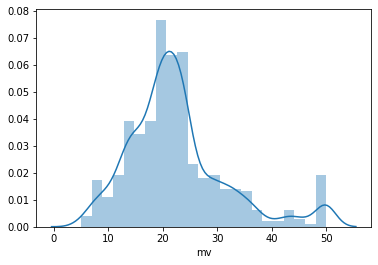

In [5]:
sns.distplot(boston_input['mv'])

The distribution is right skewed.  Variables related to money typically are skewed and should be transformed.  A natural log transformation will be applied to the target variable.  

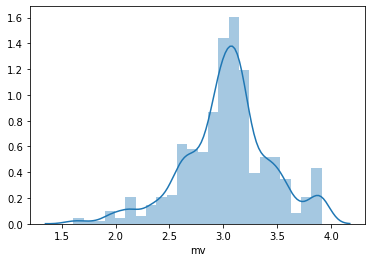

In [6]:
sns.distplot(boston_input['mv'].apply(np.log))

Now the distribution is more evenly distributed.

In [7]:
boston_input['mv'] = boston_input['mv'].apply(np.log)

### Variable Exploration

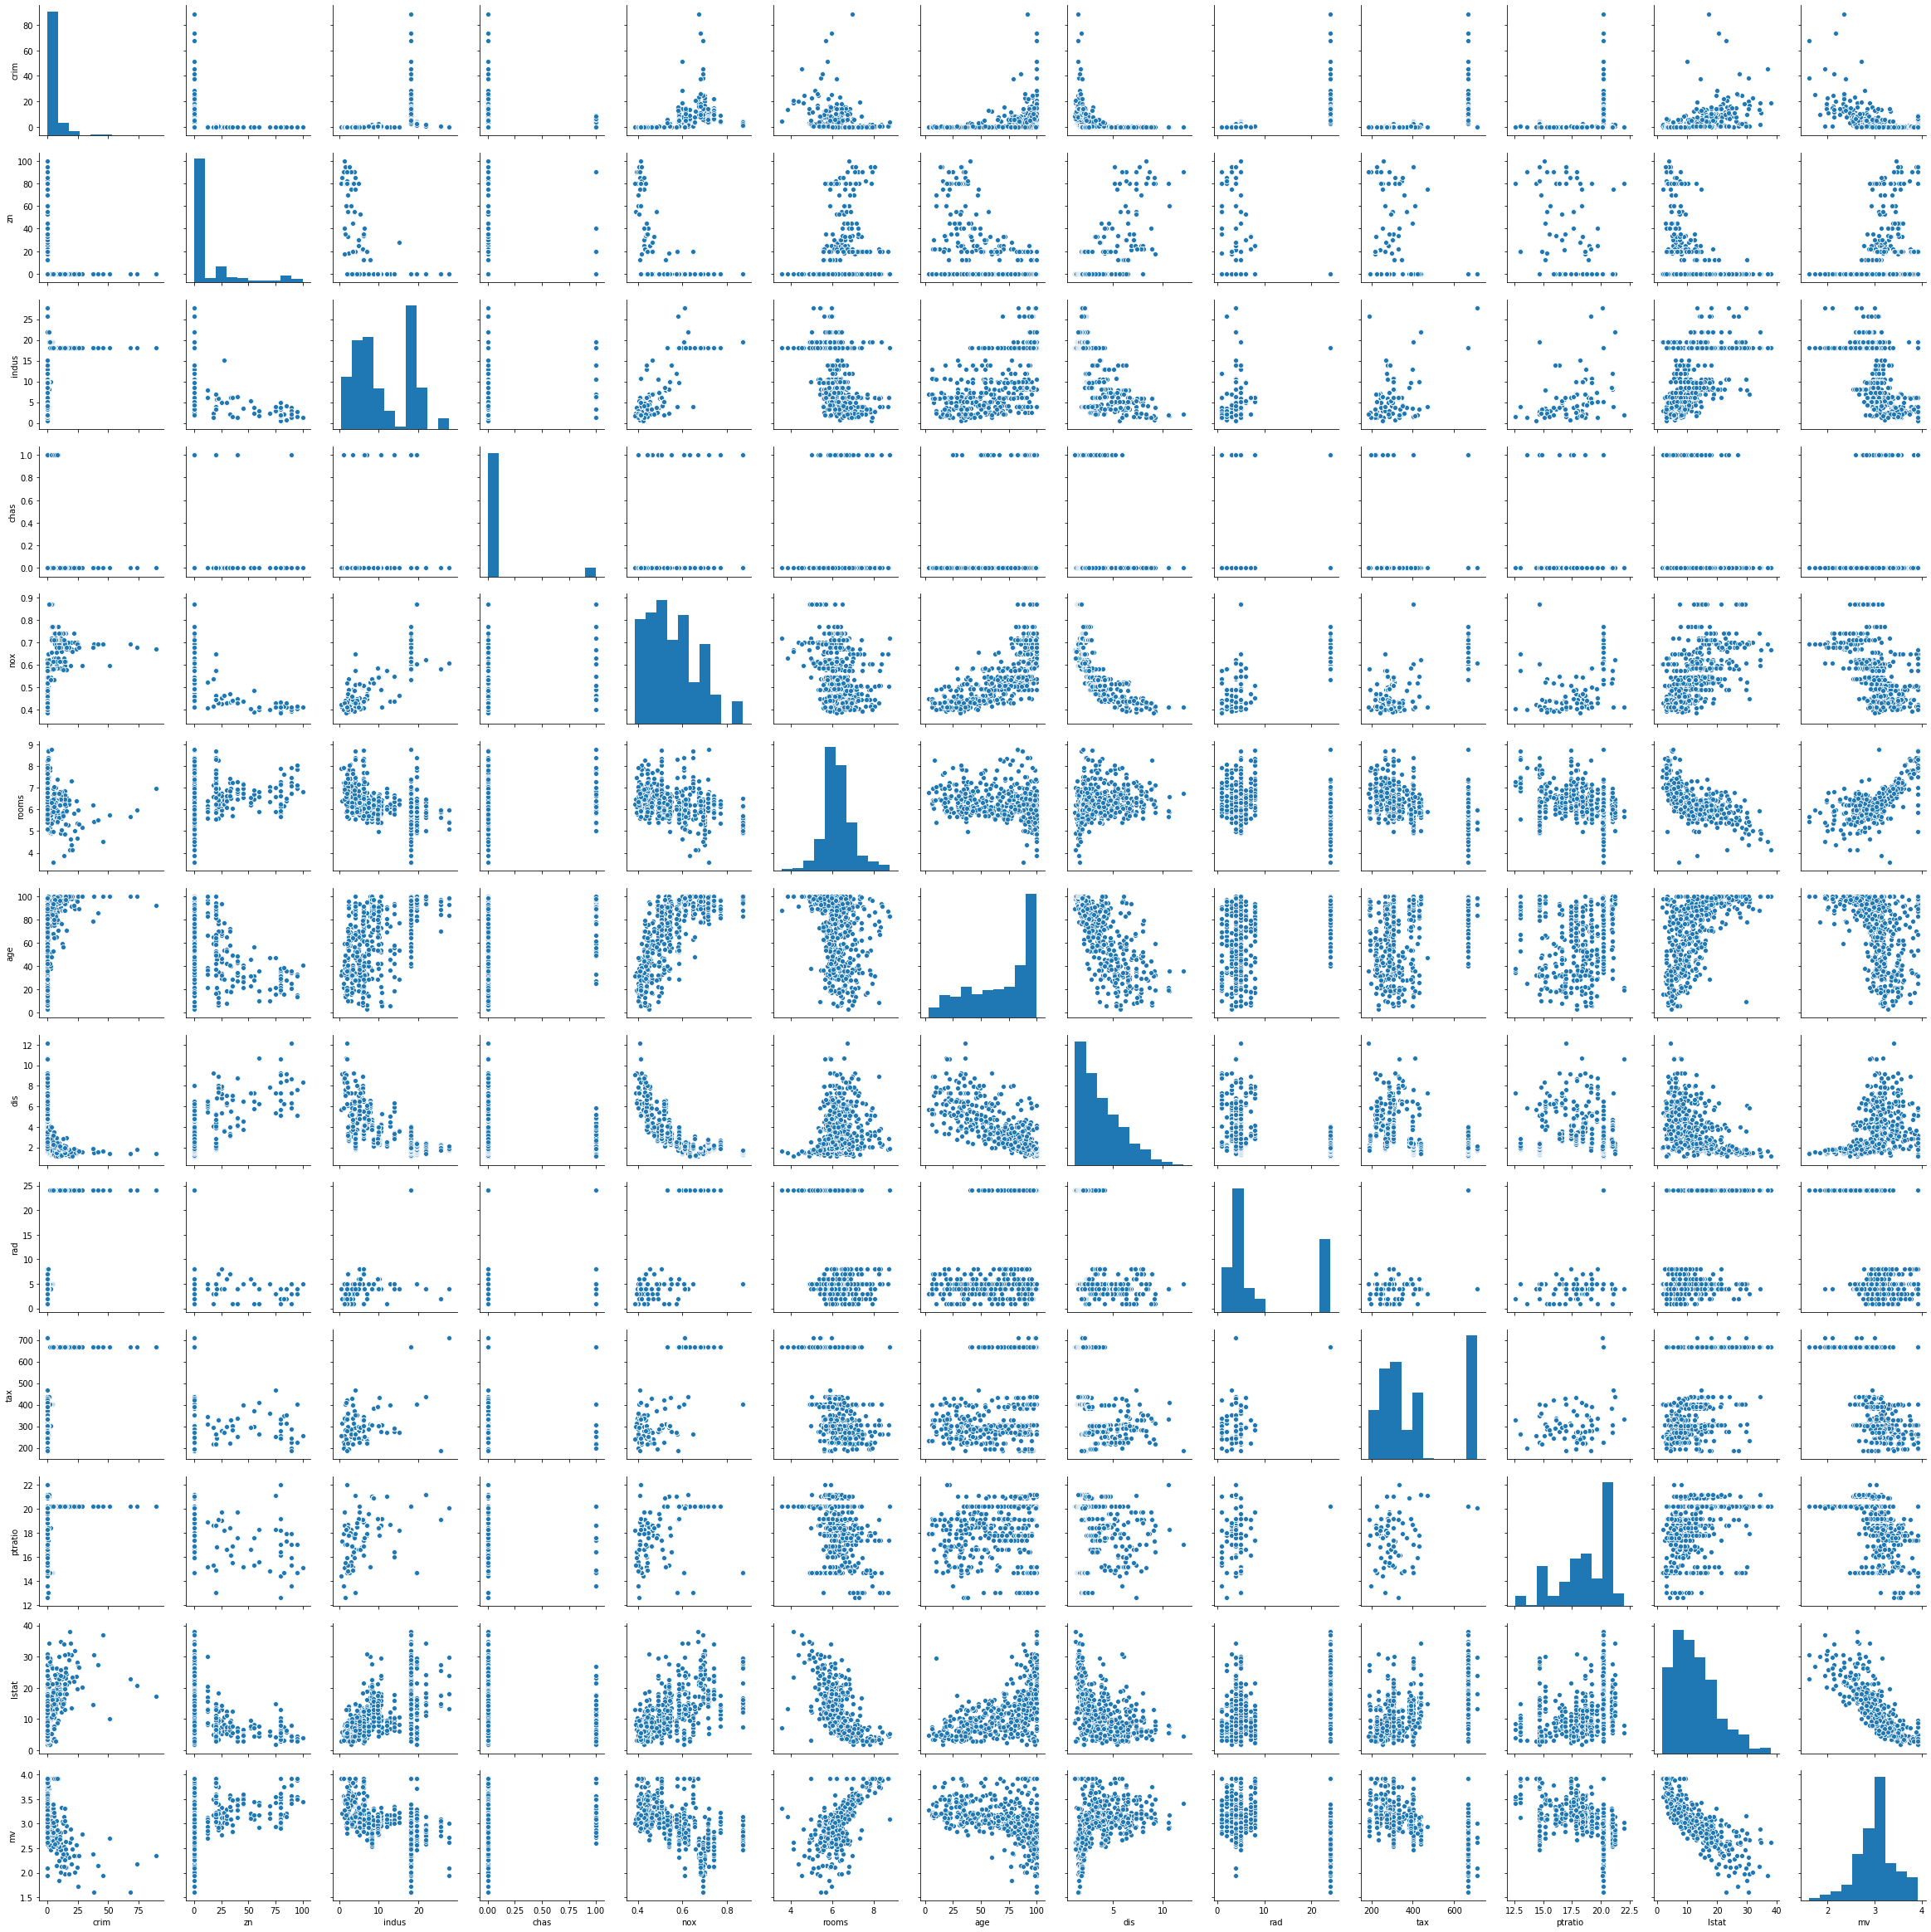

In [8]:
sns.pairplot(boston_input)

Based on the pairs plot there are correlations among the variables.  The target mv has a  linear relationship with lstat and a linear relationship with rooms.  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<Figure size 432x288 with 0 Axes>

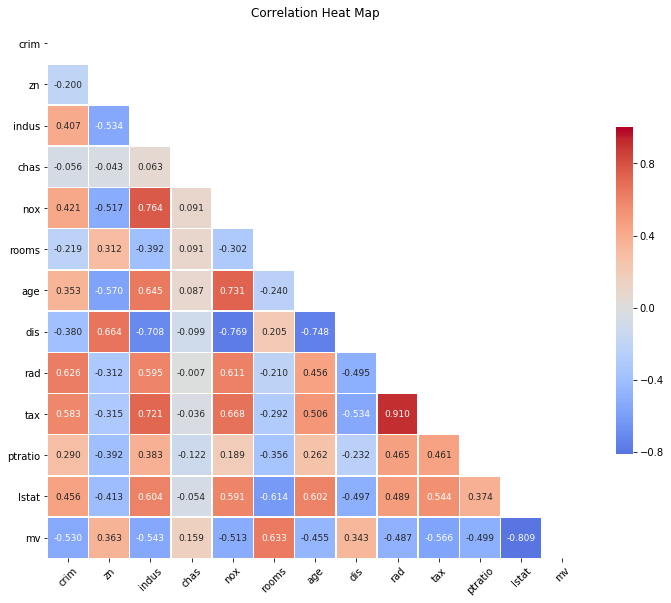

In [9]:
import matplotlib.pyplot as plt  # static plotting
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      


corr_chart(df_corr = boston_input)

Correlation heat map confirms correlation with lstat and rooms.  

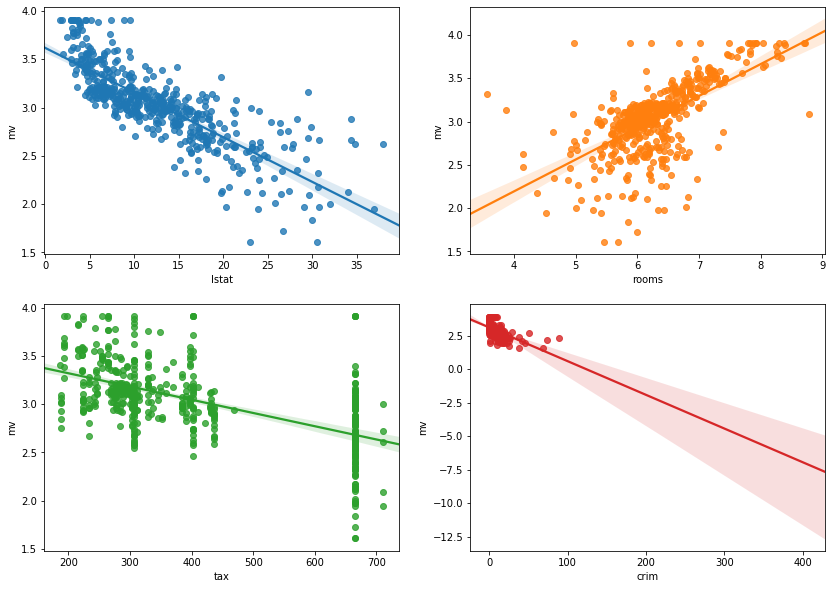

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

scatter_plot1 = pd.concat([boston_input['mv'],boston_input['lstat']],axis = 1)
sns.regplot(x='lstat',y = 'mv',data = scatter_plot1,scatter= True, fit_reg=True, ax=ax1)

scatter_plot2 = pd.concat([boston_input['mv'],boston_input['rooms']],axis = 1)
sns.regplot(x='rooms',y = 'mv',data = scatter_plot2,scatter= True, fit_reg=True, ax=ax2)

scatter_plot3 = pd.concat([boston_input['mv'],boston_input['tax']],axis = 1)
sns.regplot(x='tax',y = 'mv',data = scatter_plot3,scatter= True, fit_reg=True, ax=ax3)

scatter_plot4 = pd.concat([boston_input['mv'],boston_input['crim']],axis = 1)
sns.regplot(x='crim',y = 'mv',data = scatter_plot4,scatter= True, fit_reg=True, ax=ax4)


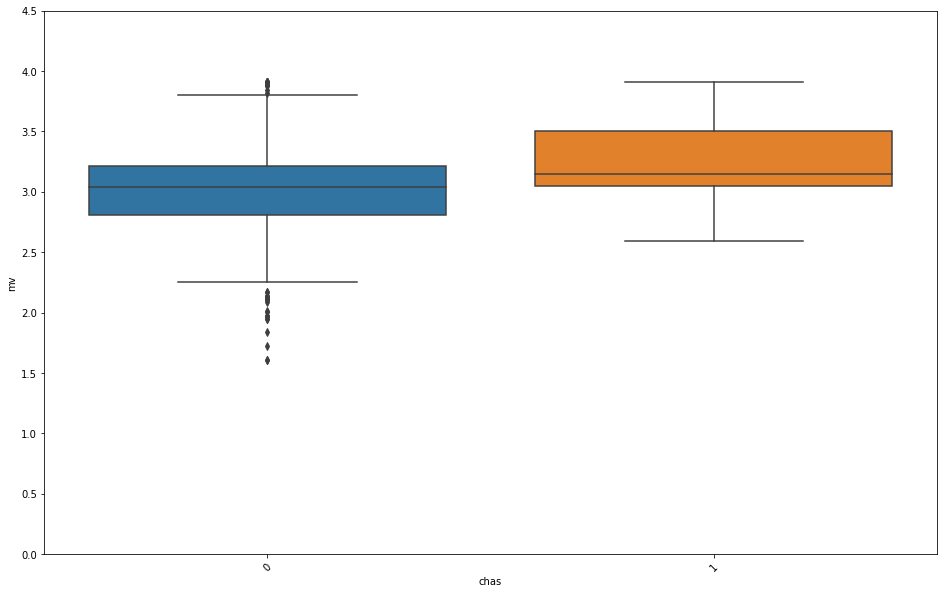

In [11]:
var = 'chas'
data = pd.concat([boston_input['mv'], boston_input[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="mv", data=data)
fig.axis(ymin=0, ymax=4.5);
xt = plt.xticks(rotation=45)

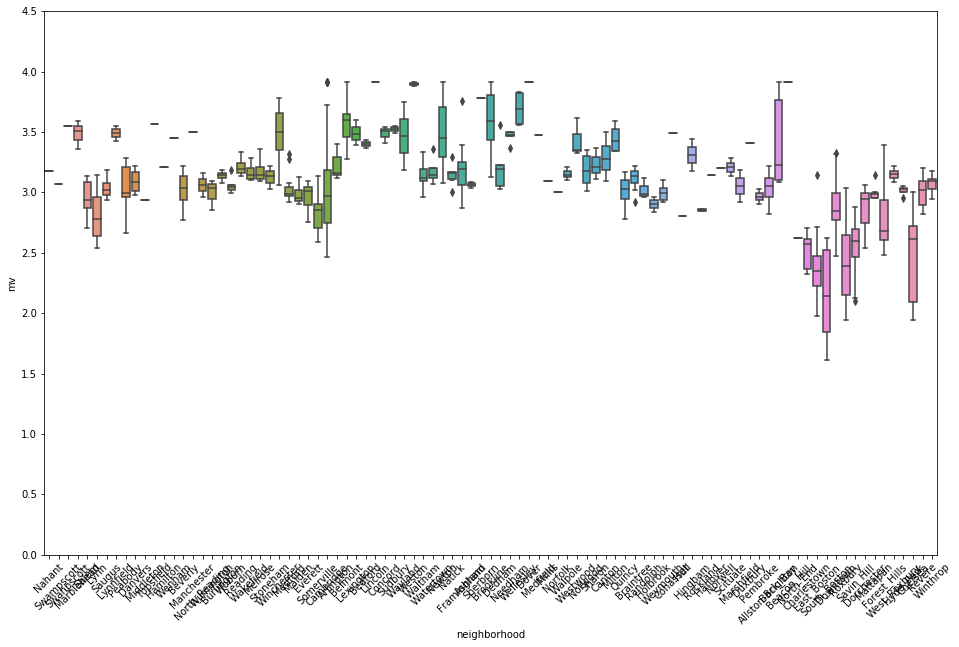

In [12]:
var = 'neighborhood'
data = pd.concat([boston_input['mv'], boston_input[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="mv", data=data)
fig.axis(ymin=0, ymax=4.5);
xt = plt.xticks(rotation=45)

### Missing Value Analysis

In [13]:
total = boston_input.isnull().sum().sort_values(ascending=False)
percent = (boston_input.isnull().sum()/boston_input.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name ='Feature'

missing_data

,Total Missing Count,% of Total Observations
Feature,,
mv,0,0.0
lstat,0,0.0
ptratio,0,0.0
tax,0,0.0
rad,0,0.0
dis,0,0.0
age,0,0.0
rooms,0,0.0
nox,0,0.0


### Simple Clustering

1.0


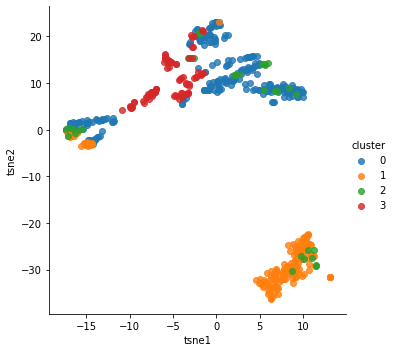

In [14]:
# Code modified from https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = boston_input[['mv', 'lstat', 'ptratio', 'tax', 'rad', 'dis', 'age', 'rooms', 'nox', 'chas', 'indus', 'zn', 'crim']].values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=13)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=4)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

## Feature Engineering

In [15]:
boston_input['LowIncomeStudentRatio'] = boston_input['ptratio'] * (boston_input['lstat']/100)
boston_input['CrimePerStudentRatio'] = boston_input['ptratio'] * boston_input['crim']
boston_input['LandPlusIndus'] = boston_input['zn'] + boston_input['indus']
boston_input['RoomsTimesAge'] = boston_input['rooms'] * boston_input['age']
boston_input['RoomsTimesLstat'] = boston_input['rooms'] * boston_input['lstat']
boston_input['LstatTimesDis'] = boston_input['lstat'] * boston_input['dis']
boston_input['LstatTimesTax'] = boston_input['lstat'] * boston_input['tax']
boston_input['RiverLstat'] = boston_input['chas'] * boston_input['lstat']
boston_input['RoomsRiver'] = boston_input['chas'] * boston_input['rooms']
boston_input['crimLstat'] = boston_input['crim'] * boston_input['lstat']

boston_input = boston_input.drop('neighborhood',1)

## Model Development

In [16]:
# Code modified from https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

### Baseline models, no engineered features

In [17]:
X = boston_input.drop(['mv','LowIncomeStudentRatio','CrimePerStudentRatio', 'LandPlusIndus', 'RoomsTimesAge', 'RoomsTimesLstat', 'LstatTimesDis', 'LstatTimesTax', 'RiverLstat', 'RoomsRiver', 'crimLstat'],1)
y = boston_input['mv']

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio)) 
rf = make_pipeline(RandomForestRegressor(n_estimators=100,
                          max_depth=5,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42))
gbr = make_pipeline(GradientBoostingRegressor(n_estimators=600,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42))

score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(rf)
print("Random Forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("Gradient Boosting: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: Deprecation

Ridge: 0.1950 (0.0291)
 2020-01-30 13:03:02.812553
LASSO: 0.1924 (0.0261)
 2020-01-30 13:03:03.195556
elastic net: 0.1924 (0.0261)
 2020-01-30 13:03:04.644537
Random Forest: 0.1660 (0.0215)
 2020-01-30 13:03:06.886530
Gradient Boosting: 0.1505 (0.0247)
 2020-01-30 13:03:19.965945


In [18]:
X = boston_input.drop('mv',1)
y = boston_input['mv']

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))
rf = RandomForestRegressor(n_estimators=100,
                          max_depth=5,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)
gbr = GradientBoostingRegressor(n_estimators=600,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(rf)
print("Random Forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("Gradient Boosting: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: Deprecation

Ridge: 0.1874 (0.0228)
 2020-01-30 13:03:23.252041
LASSO: 0.1671 (0.0283)
 2020-01-30 13:03:34.675407
elastic net: 0.1667 (0.0283)
 2020-01-30 13:03:54.334899
Random Forest: 0.1658 (0.0224)
 2020-01-30 13:03:57.667001
Gradient Boosting: 0.1518 (0.0218)
 2020-01-30 13:04:12.916628


Feature engineering added value to the model decreasing the rmse from .1924 (both lasso and elsatic net) to .1667 (elastic net).  Feature engineering did not add value for random forest and gradient boosting, likely because the features created are interation type features that should already be captured by these algorithms. Next step is to train on the entire data set.  

In [19]:
print('START Fit')

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

print('Random Forest')
rf_model_full_data = rf.fit(X, y)

print('Gradient Boosting')
gbr_model_full_data = gbr.fit(X, y)

START Fit
elasticnet
Lasso
Ridge
Random Forest
Gradient Boosting


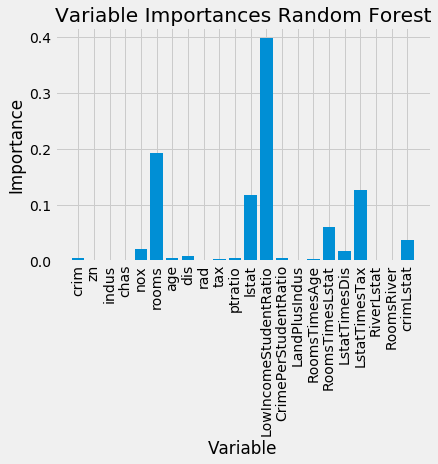

In [20]:
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
feature_list = list(X.columns)
importances = list(rf.feature_importances_)
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances Random Forest');

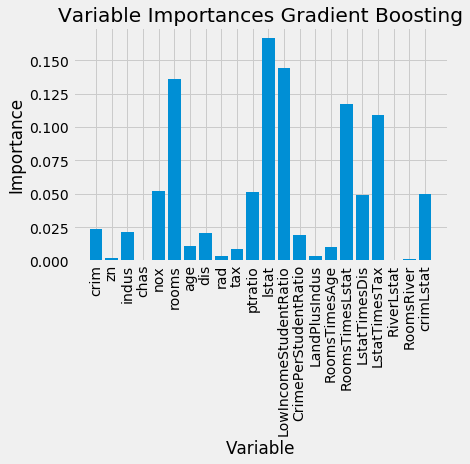

In [21]:
importances = list(gbr.feature_importances_)
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances Gradient Boosting');

## Ensemble

In [22]:
def blend_models_predict(X):
    return ((.1*elastic_model_full_data.predict(X)) + (.2*lasso_model_full_data.predict(X)) + (.2*ridge_model_full_data.predict(X)) + (.2*rf_model_full_data.predict(X)) + (.3*gbr_model_full_data.predict(X)))
            

In [23]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.13006147998463685


Ensembling further decreases the rmse for the model.

In [24]:
predictions = pd.DataFrame({"ensemble":blend_models_predict(X), "elastic":elastic_model_full_data.predict(X), "lasso":lasso_model_full_data.predict(X), "ridge":ridge_model_full_data.predict(X), "rf":rf_model_full_data.predict(X), "gbr":gbr_model_full_data.predict(X), "actual":y})
predictions.head()

,ensemble,elastic,lasso,ridge,rf,gbr,actual
0,3.326853,3.332315,3.332796,3.402019,3.302035,3.287505,3.178054
1,3.132764,3.140896,3.140970,3.188982,3.142927,3.080329,3.072693
2,3.491223,3.444940,3.444889,3.428417,3.514824,3.563677,3.546740
3,3.478048,3.394907,3.394699,3.394381,3.531729,3.581319,3.508556
4,3.427982,3.340638,3.340147,3.333490,3.507508,3.525632,3.589059


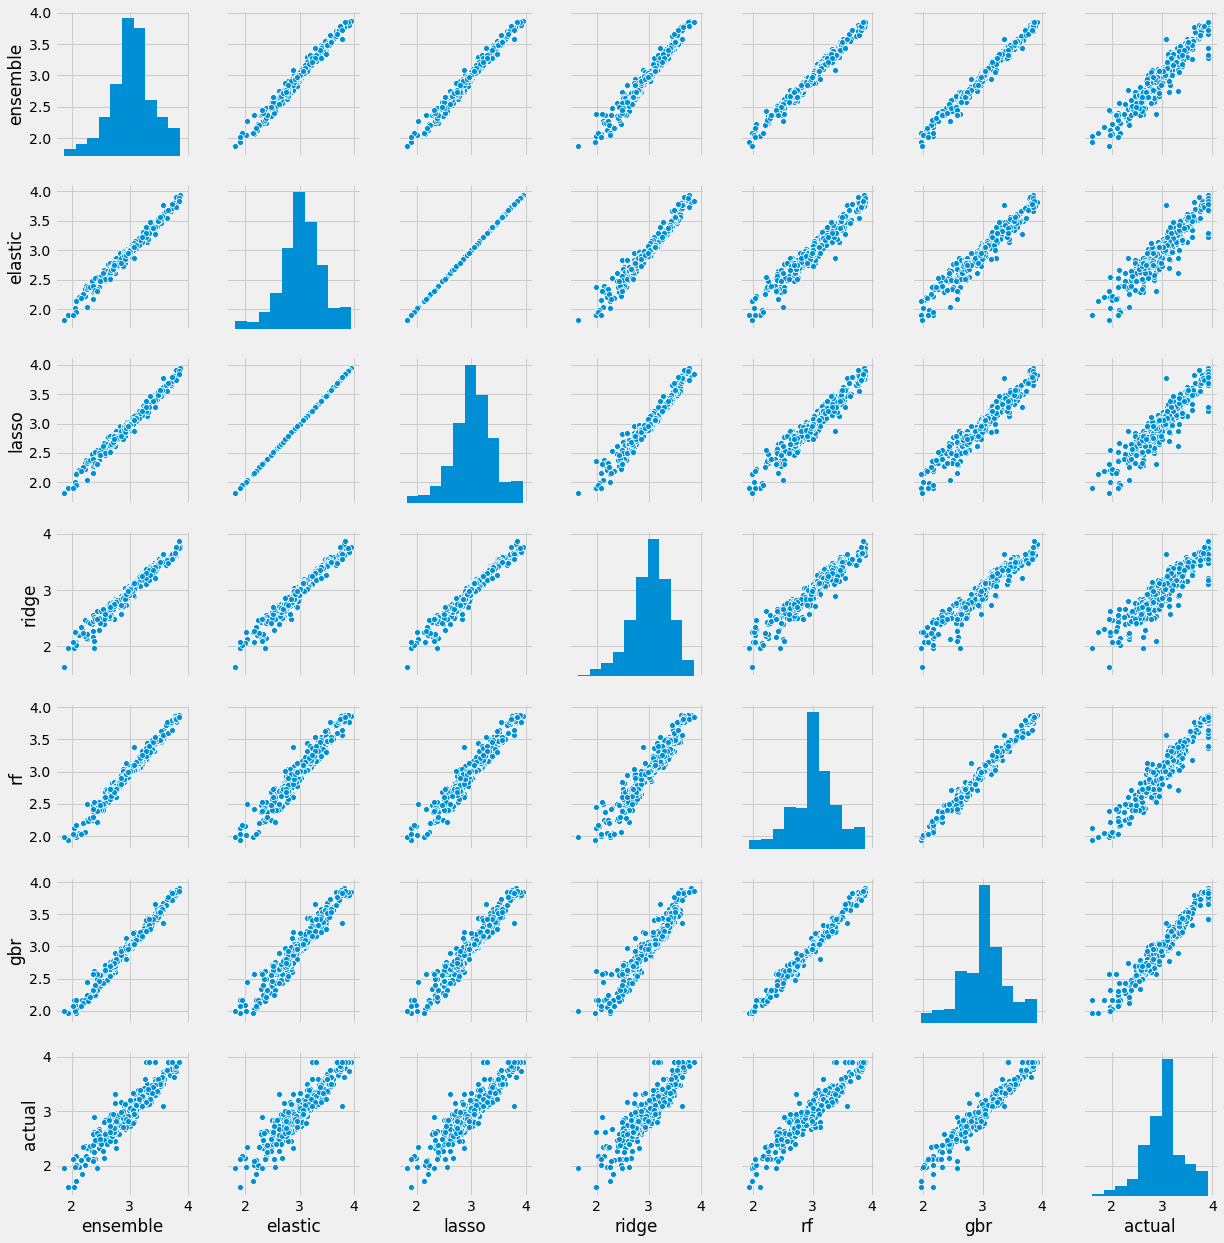

In [25]:
sns.pairplot(predictions)

It appears that the elastic net model and the lasso model arrived at the same solution.  The cross validated rmse on the elastic net model is better than the lasso model so there must be a slight difference. Overall, the addition of a random forest and gradient boosting to the ensemble drastically improved the rmse. 

## Conclusion

Prior to feature engineering the modeling method that yielded the best results was either elastic net or lasso.  Post feature engineering the modeling method that yielded the best results was elastic net.  Using an ensemble of ridge, elastic net, and lasso resulted in further improvement.  Because of these results I would recommend  the ensemble to management  because it gave the lowest root mean square error.  If an individual model needs to be used then the elastic net model post feature engineering gives the best results.  This model was chosen because of it's low cross validation room mean square error. 

With the addition of a random forest and gradient boosting model, the gradient boosting model performs the best with or without engineered features (engineered features actually hurt the gradient boosting model).